Project 1: Employee Attrition Analysis

In [1]:
import numpy as np  
import pandas as pd  
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
data = pd.read_csv("dataset.csv", sep = ',')
data_frame = pd.DataFrame(data)

In [4]:
data_frame

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [5]:
data_frame.shape

(4410, 29)

In [6]:
data_frame.isnull()
data_frame.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

Columns NumCompaniesWorked, TotalWorkingYear, EnvironmentSatisfaction, JobSatisfaction and WorkLifeBalance have NULL values. As all of them have numerical values, it would be a good idea to fill the NULL values with the mean of the Data.

Calculating Mean for: NumCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction and WorkLifeBalance

In [7]:
mean_value_column_1 = data_frame['NumCompaniesWorked'].mean()
data_frame['NumCompaniesWorked'].fillna(mean_value_column_1, inplace=True)

mean_value_column_2 = data_frame['TotalWorkingYears'].mean()
data_frame['TotalWorkingYears'].fillna(mean_value_column_2, inplace=True)

mean_value_column_3 = data_frame['EnvironmentSatisfaction'].mean()
data_frame['EnvironmentSatisfaction'].fillna(mean_value_column_3, inplace=True)

mean_value_column_4 = data_frame['JobSatisfaction'].mean()
data_frame['JobSatisfaction'].fillna(mean_value_column_4, inplace=True)

mean_value_column_5 = data_frame['WorkLifeBalance'].mean()
data_frame['WorkLifeBalance'].fillna(mean_value_column_5, inplace=True)

In [8]:
data_frame.isnull()
data_frame.isnull().sum()

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [9]:
data_frame.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.493497,3.659108,0.0,...,7.774275,1.288978,6.125135,3.221699,3.567327,1.089654,1.098753,0.703195,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [10]:
num = data_frame.select_dtypes(include=np.number).columns
len(num)

21

In [11]:
for i in num:
    print("The no.of unique values in",i,"are: ", data_frame.loc[:,i].nunique())

The no.of unique values in EmployeeID are:  4410
The no.of unique values in Age are:  43
The no.of unique values in DistanceFromHome are:  29
The no.of unique values in Education are:  5
The no.of unique values in EmployeeCount are:  1
The no.of unique values in JobLevel are:  5
The no.of unique values in MonthlyIncome are:  1349
The no.of unique values in NumCompaniesWorked are:  11
The no.of unique values in PercentSalaryHike are:  15
The no.of unique values in StandardHours are:  1
The no.of unique values in StockOptionLevel are:  4
The no.of unique values in TotalWorkingYears are:  41
The no.of unique values in TrainingTimesLastYear are:  7
The no.of unique values in YearsAtCompany are:  37
The no.of unique values in YearsSinceLastPromotion are:  16
The no.of unique values in YearsWithCurrManager are:  18
The no.of unique values in EnvironmentSatisfaction are:  5
The no.of unique values in JobSatisfaction are:  5
The no.of unique values in WorkLifeBalance are:  5
The no.of unique v

Data Cleaning

In [12]:
data_frame.Over18.value_counts()
data_frame.groupby('StandardHours').size()
data_frame.groupby('EmployeeCount').size()

EmployeeCount
1    4410
dtype: int64

In [13]:
data_frame.drop(columns=['Over18', 'StandardHours', 'EmployeeCount', 'StockOptionLevel', 'TrainingTimesLastYear', 'DistanceFromHome'], inplace=True)

In [14]:
print(data_frame.duplicated().value_counts())
data_frame.drop_duplicates(inplace=True)
print(len(data_frame))

False    4410
Name: count, dtype: int64
4410


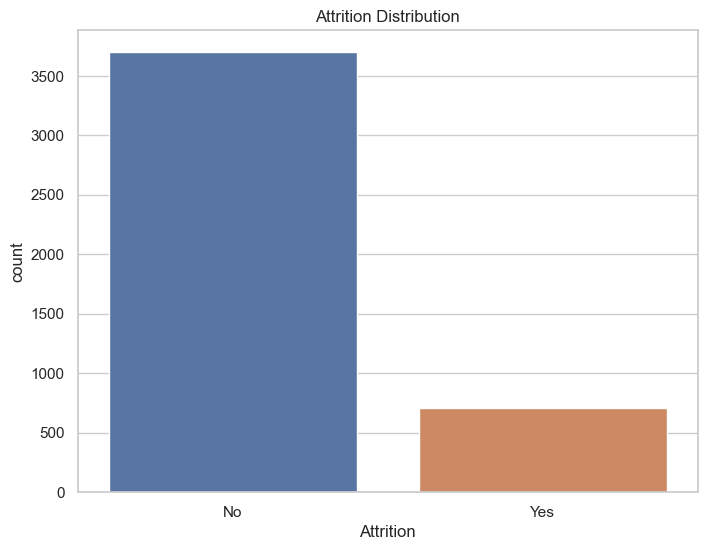

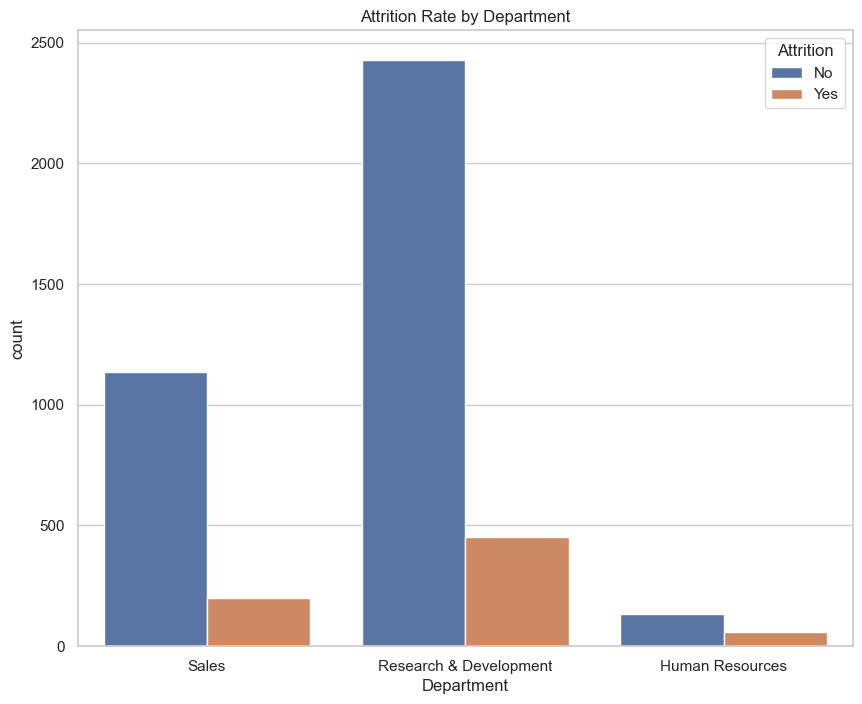

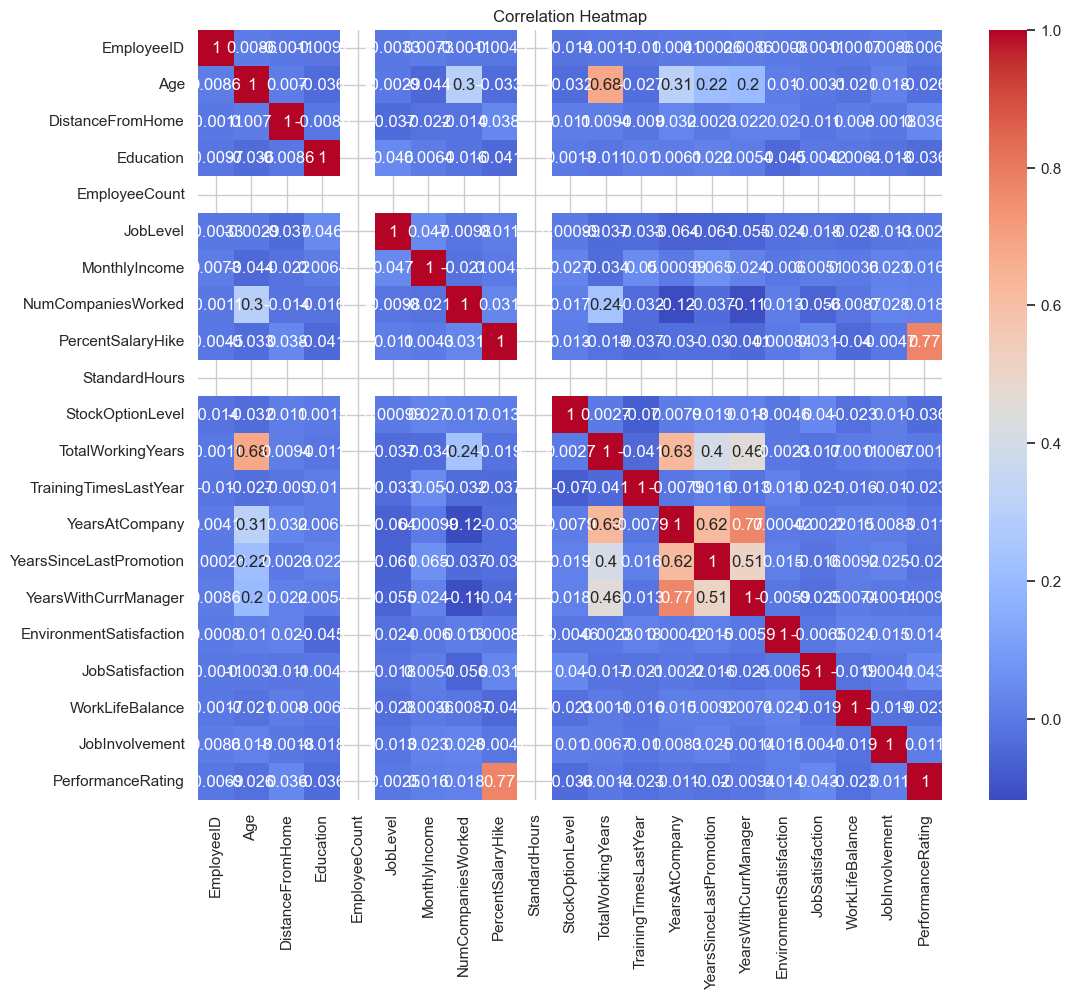

In [15]:
sns.set(style="whitegrid")

# Plot the distribution of attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Distribution')
plt.show()

# Plot attrition rate by department
plt.figure(figsize=(10, 8))
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Attrition Rate by Department')
plt.show()

# Only keep numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

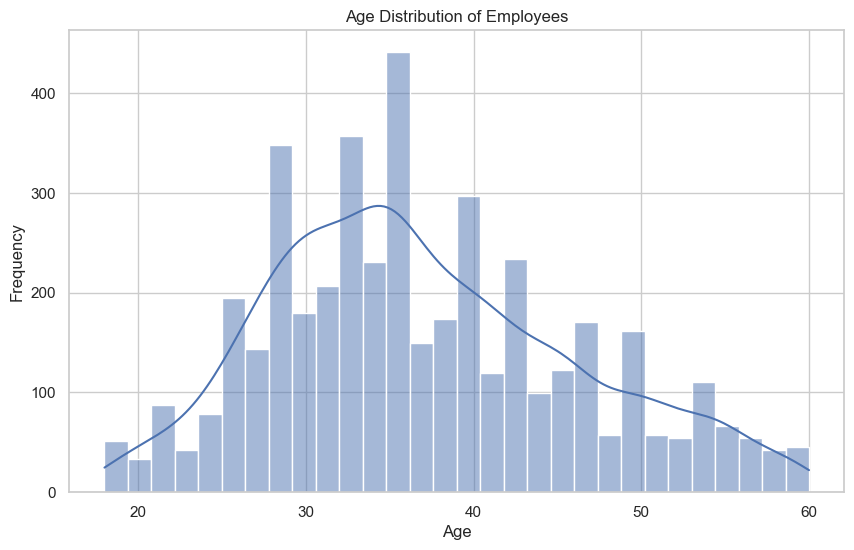

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

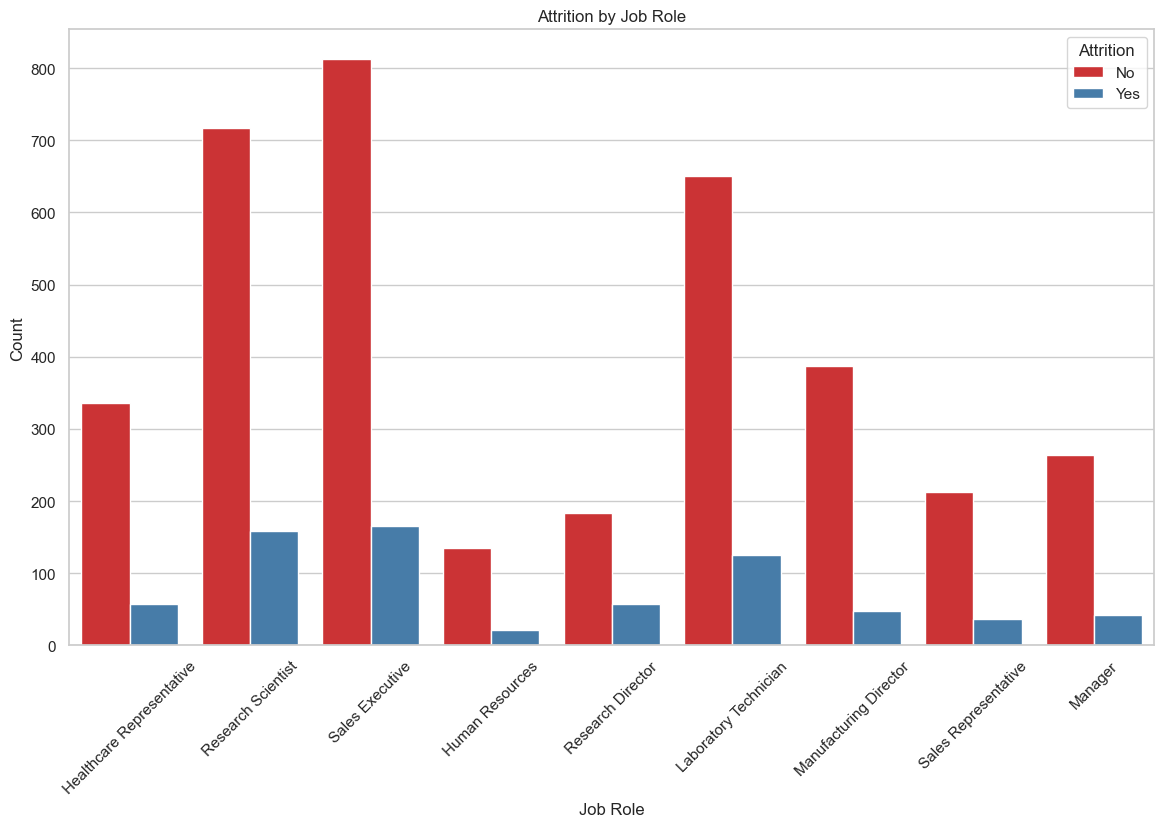

In [17]:
plt.figure(figsize=(14, 8))
sns.countplot(x='JobRole', hue='Attrition', data=data, palette='Set1')
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

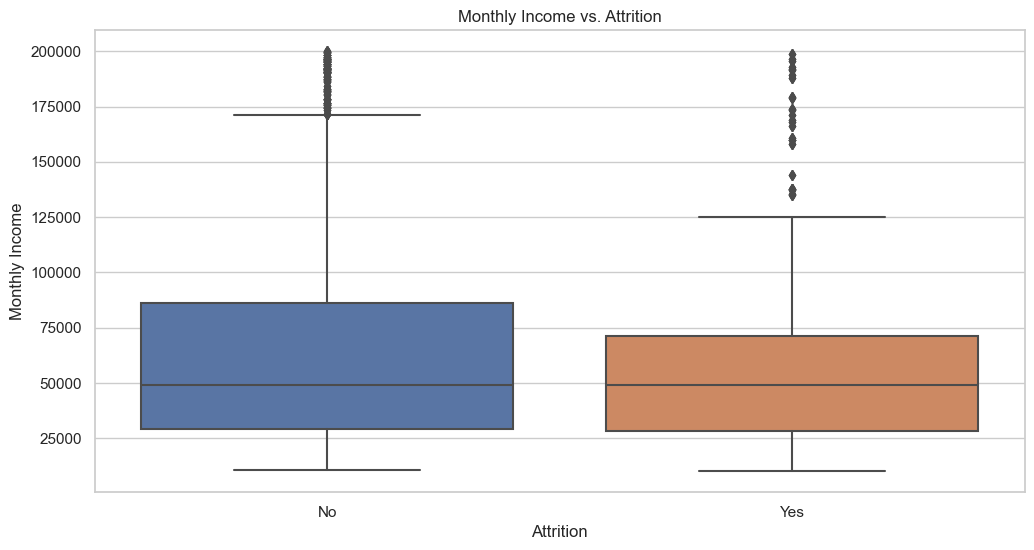

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Monthly Income vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

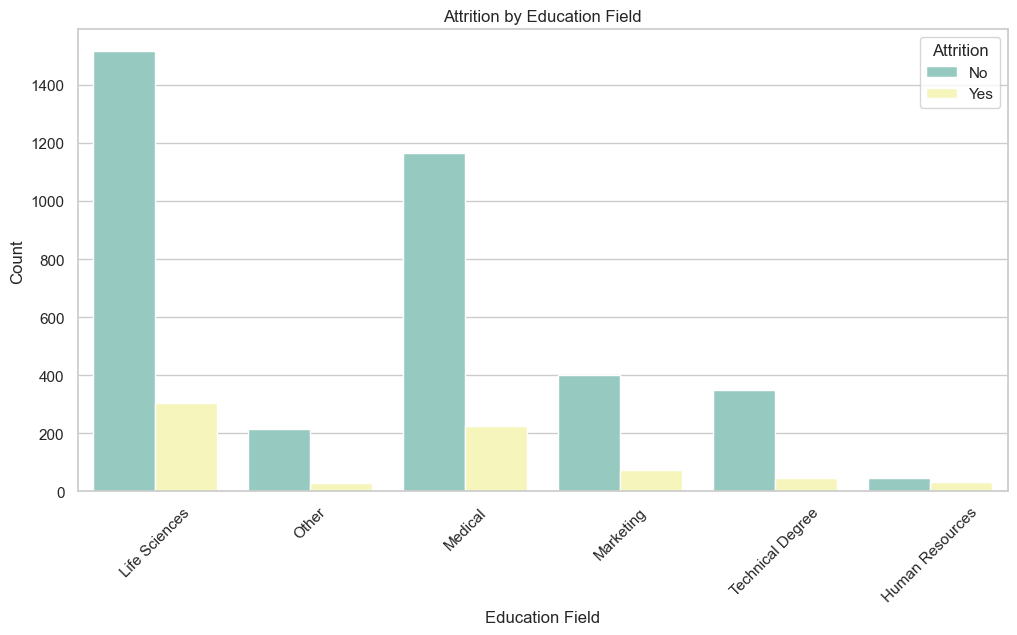

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='EducationField', hue='Attrition', data=data, palette='Set3')
plt.title('Attrition by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Pairplot to Visualize Relationships

c:\Users\nandhana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


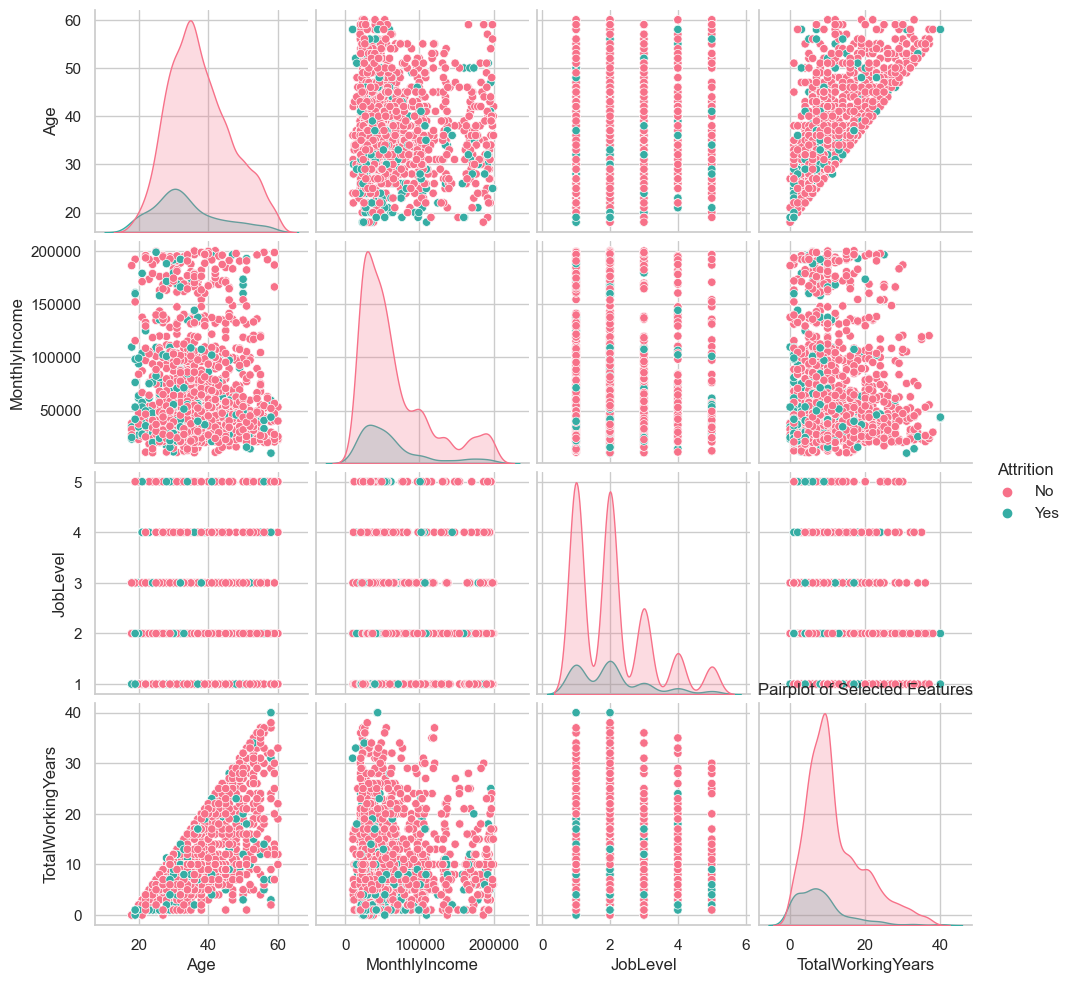

In [20]:
subset = data[['Age', 'MonthlyIncome', 'JobLevel', 'TotalWorkingYears', 'Attrition']]

# Create pairplot
sns.pairplot(subset, hue='Attrition', palette='husl')
plt.title('Pairplot of Selected Features')
plt.show()

Attrition by Years at Company

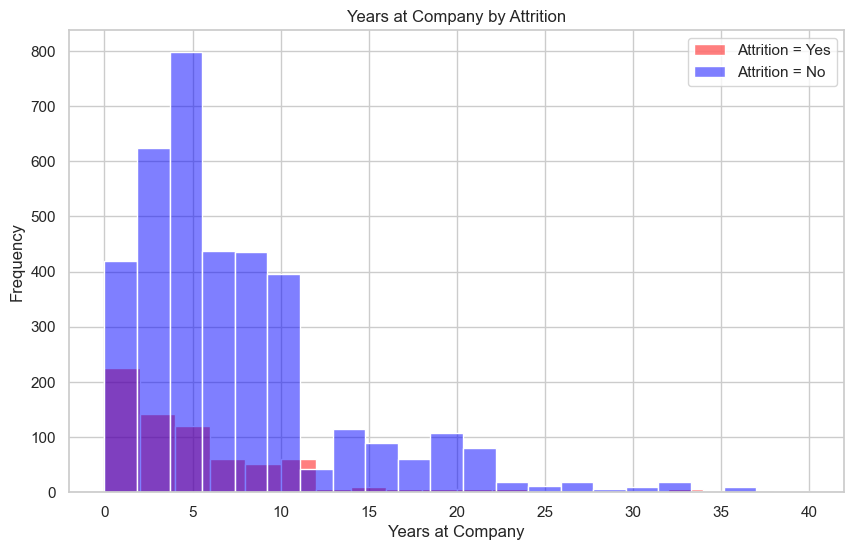

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Attrition'] == 'Yes']['YearsAtCompany'], bins=20, color='red', alpha=0.5, label='Attrition = Yes')
sns.histplot(data[data['Attrition'] == 'No']['YearsAtCompany'], bins=20, color='blue', alpha=0.5, label='Attrition = No')
plt.title('Years at Company by Attrition')
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Attrition by Business Travel

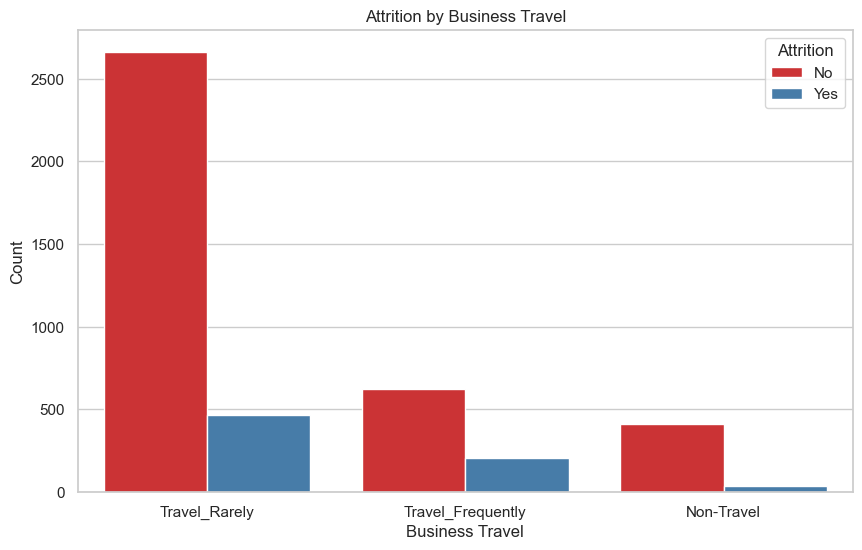

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=data, palette='Set1')
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show()

Attrition by Marital Status

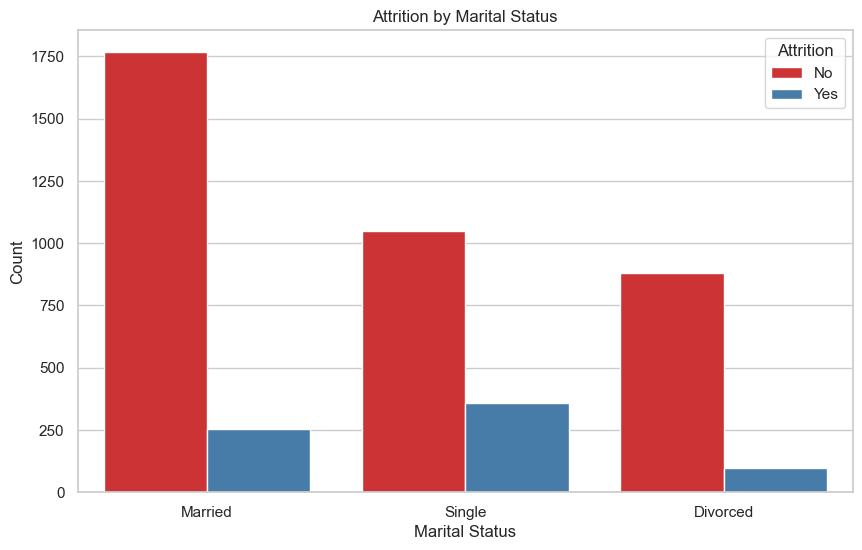

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=data, palette='Set1')
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

Attrition by Job Satisfaction

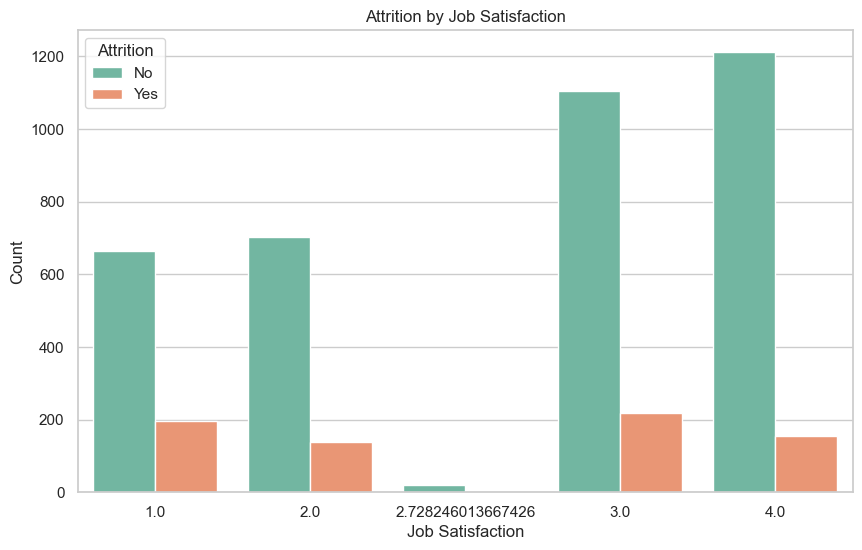

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=data, palette='Set2')
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

Attrition by Work-Life Balance

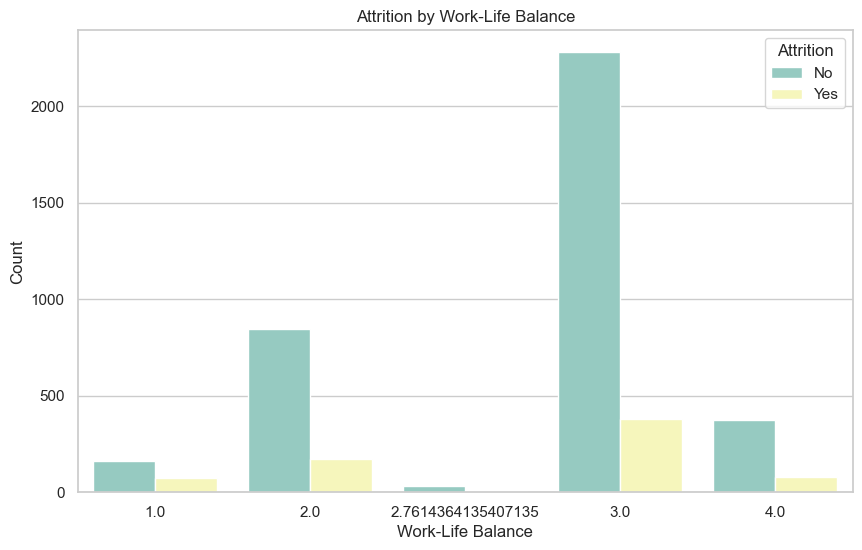

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=data, palette='Set3')
plt.title('Attrition by Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.show()

Model Building and Evaluation

In [27]:
data_encoded = pd.get_dummies(data, drop_first=True)
X = data_encoded.drop('Attrition_Yes', axis=1)
y = data_encoded['Attrition_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
[[1115    0]
 [  27  181]]

Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1115
        True       1.00      0.87      0.93       208

    accuracy                           0.98      1323
   macro avg       0.99      0.94      0.96      1323
weighted avg       0.98      0.98      0.98      1323


Accuracy Score:
97.95918367346938


Attrition by Department Insight: Certain departments may have higher attrition rates compared to others. Actionable Step: Focus on departments with higher attrition rates to identify specific issues and develop targeted retention strategies.
Attrition by Job Role Insight: Different job roles might experience varying levels of attrition. Actionable Step: Investigate the job roles with higher attrition to understand the underlying reasons, such as job satisfaction, workload, or career advancement opportunities.
Monthly Income vs. Attrition Insight: There might be a correlation between monthly income and attrition rates. Actionable Step: If lower-income employees are leaving at higher rates, consider reviewing compensation structures and offering competitive salaries.
Overtime and Attrition Insight: Employees who work overtime frequently might have higher attrition rates. Actionable Step: Evaluate workload and work-life balance policies. Consider implementing measures to reduce overtime and improve employee well-being.
Years at Company and Attrition Insight: Attrition rates might vary based on the tenure of employees. Actionable Step: Identify critical periods where attrition spikes (e.g., after 1 year, 3 years). Develop engagement and development programs targeted at these key tenure milestones.
Correlation Heatmap Insight: The correlation heatmap reveals relationships between various numeric features and attrition. Actionable Step: Use this information to identify factors that are strongly correlated with attrition and focus on them for deeper analysis and action.
Attrition by Business Travel Insight: Employees who travel frequently for business might have different attrition rates compared to those who do not. Actionable Step: Assess the impact of business travel on employee satisfaction and retention. Consider policies that minimize travel-related stress.
Job Satisfaction and Work-Life Balance Insight: These factors can have a significant impact on employee retention. Actionable Step: Conduct surveys and focus groups to understand employee satisfaction and work-life balance. Implement programs to enhance these aspects.
Education and Attrition Insight: Employees with different educational backgrounds might have varying attrition rates. Actionable Step: Tailor professional development and career advancement opportunities to different educational backgrounds.
Attrition by Marital Status Insight: Marital status might influence attrition rates. Actionable Step: Consider family-friendly policies and benefits to support employees with different personal situations.
Summary of Recommendations: Targeted Retention Strategies: Focus on departments, job roles, and tenure periods with higher attrition.

Compensation Review: Ensure competitive salaries and benefits, especially for lower-income roles.

Work-Life Balance: Implement policies to reduce overtime and enhance work-life balance.

Employee Development: Provide career development opportunities and clear advancement paths.

Employee Well-being: Offer programs that support employee well-being, such as flexible work arrangements and wellness programs.

Family-Friendly Policies: Consider implementing policies that support employees with families, such as parental leave and childcare support.